In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('../data/training.1600000.processed.noemoticon.csv',encoding='latin-1',header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.loc[:,5][0:10000]

0       @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       is upset that he can't update his Facebook by ...
2       @Kenichan I dived many times for the ball. Man...
3         my whole body feels itchy and like its on fire 
4       @nationwideclass no, it's not behaving at all....
                              ...                        
9995                                      Aww that's sad 
9996      stupid dvds stuffing up the good bits in jaws. 
9997    @Dandy_Sephy No. Only close friends and family...
9998    CRAP! After looking when I last tweeted... WHY...
9999                            Its Another Rainboot day 
Name: 5, Length: 10000, dtype: object

In [5]:
train10k = pd.DataFrame(df.loc[:,5][0:10000])

In [6]:
train10k.rename(columns={5:'tweets'},inplace=True)

In [7]:
train10k.head()

,tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."


In [8]:
import re
import string
from nltk.tokenize import word_tokenize

In [9]:
def tweet_clean(tweet):
     return re.sub('[^\w\s]','',tweet)

def to_lower(tweet):
    result = tweet.lower()
    return result

def remove_hyperlink(tweet):
    return  re.sub(r"http\S+", "", tweet)

def remove_number(tweet):
    result = re.sub(r'\d+', '', tweet)
    return result

def remove_punctuation(tweet):
    result = tweet.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_whitespace(tweet):
    result = tweet.strip()
    return result

def replace_newline(tweet):
    return tweet.replace('\n','')
    

In [10]:
def clean_up_pipeline(tweets):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      tweet_clean,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        tweets = o(tweets)
    return tweets

In [11]:
tweet_pipe = [clean_up_pipeline(o) for o in train10k['tweets']]

In [12]:
tweet_pipe[:5]

['switchfoot   awww thats a bummer  you shoulda got david carr of third day to do it d',
 'is upset that he cant update his facebook by texting it and might cry as a result  school today also blah',
 'kenichan i dived many times for the ball managed to save   the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there']

In [13]:
tweet_pre = pd.DataFrame(tweet_pipe)

In [14]:
tweet_pre.rename(columns={0:'tweets'},inplace=True)

In [91]:
tweet_pre[:2]

,tweets,sentiment
0,switchfoot awww thats a bummer you shoulda ...,0.2
1,is upset that he cant update his facebook by t...,0.0


In [16]:
tweet_pre.to_csv('../data/tweet10k.csv', header=True)

## Sentiments
TextBlob returns a tuple representing polarity and subjectivity of each tweet.   
Here, we only extract polarity as it indicates the sentiment.  
Value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment

In [ ]:
# from textblob import TextBlob
# tweet_20['sentiment'] =tweet_20.apply(lambda x: TextBlob(x).sentiment)
# # tweet_20.head()

In [17]:
from textblob import TextBlob

In [18]:
tweet_pre['sentiment'] = tweet_pre['tweets'].apply(lambda x: TextBlob(x).sentiment[0] )

In [98]:
print(tweet_pre[:2])

                                              tweets  sentiment
0  switchfoot   awww thats a bummer  you shoulda ...        0.2
1  is upset that he cant update his facebook by t...        0.0


In [139]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
# from wordcloud import WordCloud, STOPWORDS


In [177]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

more_stopwords = ['one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown','im','really','need','miss',
                 'get','twitter','still','day','now','will','make','much','cant','got','lol']

all_stop_words = stop_words + more_stopwords

In [178]:
def tokenizer(text):
    return word_tokenize(text)

# def tokenizer_porter(text):
#     return [porter.stem(word) for word in text.split()]

def remove_stop_words(text):
    result = [i for i in text if i not in all_stop_words]
    return result

def word_lemmatizer(text):
    return [lemmatizer.lemmatize(o) for o in text]

def word_stemmer(text):
    return [stemmer.stem(o) for o in text]

In [119]:
def clean_token_pipeline(text):
    cleaning_utils = [tokenizer,remove_stop_words,word_lemmatizer]
    for o in cleaning_utils:
        text = o(text)
    return text

In [179]:
X_tweets_token = [clean_token_pipeline(o) for o in tweet_pre['tweets']]

In [180]:
X_tweets_token[1:2]

[['upset',
  'update',
  'facebook',
  'texting',
  'might',
  'cry',
  'result',
  'school',
  'today',
  'also',
  'blah']]

In [ ]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')
# rmstop = [w for w in tweet_pre['tweets'].split() if w not in stop]

##  Wordcloud

In [77]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [78]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown','im','time','really'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

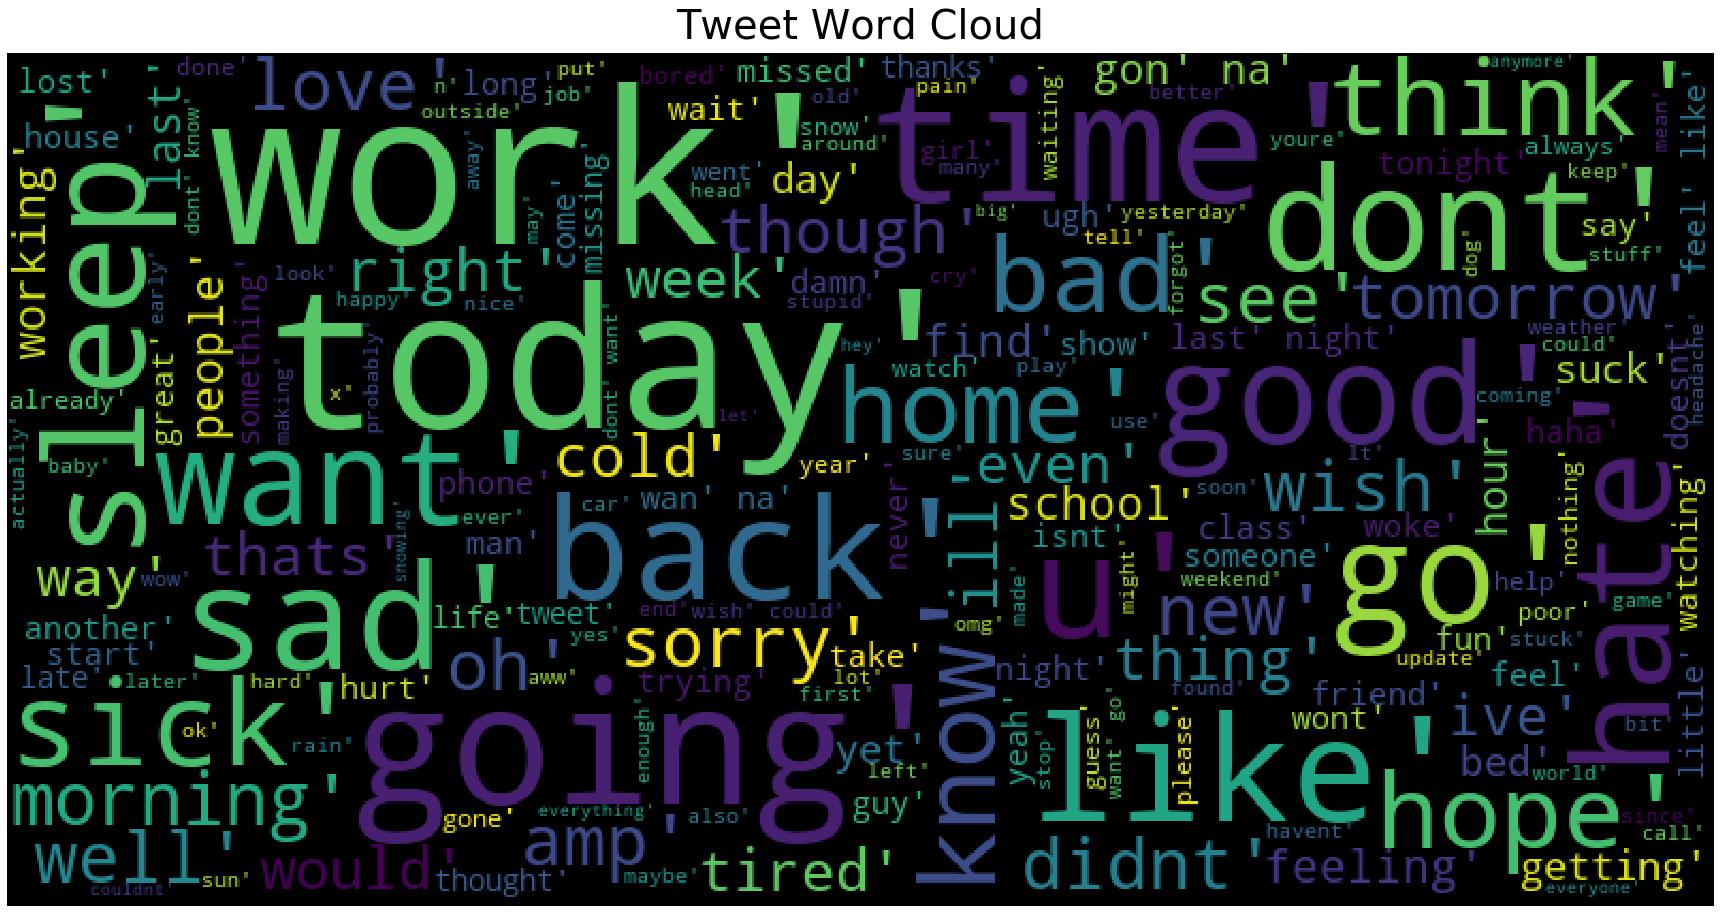

In [181]:
plot_wordcloud(X_tweets_token,title = 'Tweet Word Cloud')

## Latent Dirichlet Allocation scikit-learn

In [182]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words=all_stop_words,  #'english',
                        max_df=.1,
                        max_features=5000)
X = count.fit_transform(tweet_pre['tweets'].values)

/home/hyper/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['po', 'unknown'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [183]:
print(X.shape)

(10000, 5000)


In [184]:
print(X[:1])

  (0, 249)	1
  (0, 4328)	1
  (0, 560)	1
  (0, 3842)	1
  (0, 1034)	1
  (0, 4348)	1


In [185]:
feature_names = count.get_feature_names()

In [186]:
feature_names[2000:2020]

['hint',
 'hip',
 'hire',
 'hiring',
 'history',
 'hit',
 'hits',
 'hitting',
 'hm',
 'hmm',
 'hmmm',
 'hmmph',
 'hmv',
 'ho',
 'hobby',
 'hockey',
 'hold',
 'holding',
 'holds',
 'hole']

In [187]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10,
                                random_state=123,
                                learning_method='batch')
X_topics = lda.fit_transform(X)

In [188]:
lda.components_.shape

(10, 5000)

In [190]:
n_top_words = 3
feature_names = count.get_feature_names()

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words - 1:-1]]))

Topic 1:
cold didnt go
Topic 2:
today wish could
Topic 3:
hate morning hurts
Topic 4:
getting hope ive
Topic 5:
dont want oh
Topic 6:
today life fun
Topic 7:
ill go sleep
Topic 8:
good home dont
Topic 9:
sorry sad hear
Topic 10:
work going morning


In [ ]:
n_top_words = 2
feature_names = count.get_feature_names()

for topic_idx, topic in enumerate(lda.components_):
            for i in topic.argsort()\
                        [:-n_top_words - 1:-1]]))
#     print("Topic %d:" % (topic_idx + 1))
#     print(" ".join([feature_names[i]
#                     for i in topic.argsort()\
#                         [:-n_top_words - 1:-1]]))